# Part 4 of Quick Start: Links & rules

This page is primarily based on the following page at the Circos documentation site:

- [4. LINKS & RULES](http://circos.ca/documentation/tutorials/quick_start/links_and_rules/)

That page is found as part number 4 of the nine part [the 'QUICK START' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).

Go back to Part 3 by clicking [here &#8592;](Quick_Start_Part3.ipynb).

----



## Links & rules

This is the fourth step in the series of nine Quick Guide tutorials. 

This is the first data track that Martin illustrates adding.

The following is adapted from the documentation page:

Links represent an association between two genomic positions (e.g. similarity, difference, fusion, etc) by curves or straight lines.

Links can be visually formatted using rules, which compose a decision tree of expressions that are evaluated for every link. Rules test links based on data value, and can therefore dynamically change how a link appears based on its position, size, or other parameter.

But before adding links to the image from the previous tutorial, I want to show you another way of changing the colors of ideograms that is more helpful if you want to reuse the custom colors for other elements in the image.

### CUSTOM COLORS

If you look in the human karyotype file linked to above, you'll see that each chromosome's color is `chrN` where `N` is the number of the chromosome. Thus, chromosome `hs1` has color `chr1`, `hs2 `has color `chr2` and so on. For convenience, a color can be referenced using `chr` and `hs` prefixes (`chr1` and `hs1` are the same color).

Because the color and chromosome name is the same for human genome data (or any data set in which you use `chr` or `hs` as the chromosome prefix), you can color a data point by using its chromosome name.

In the previous tutorial, I used `chromosomes_colors` to change the color of the ideograms. This approach works well when the only thing you want to do is change the color of the segments, because although the color of `hs1` on the image has changed, the definition of color `hs1` remains the same.

```ini
chromosomes_color = hs1=red,hs2=orange,hs3=green,hs4=blue
```

To change the color of the ideogram and color of the same name, you need to redefine the value of the color in the ```<colors>``` block. This block is included below from the `colors_fonts_patterns.conf` file, which contains all the default definitions. To overwrite colors, use a `*` suffix and provide a new value, which can be a lookup to another color.

```ini
<colors>
chr1* = red
chr2* = orange
chr3* = green
chr4* = blue
</colors>
```

### LINKS

Links are defined in `<link>` blocks enclosed in a `<links>` block. The links start at a radial position defined by `radius` and have their control point (adjusts curvature) at the radial position defined by `bezier_radius`. In this example, I use the segmental duplication data set, which connects regions of similar sequence (90%+ similarity, at least 1kb in size).

```ini
<links>

<link>
file          = data/5/segdup.txt
radius        = 0.8r
bezier_radius = 0r
color         = black_a4
thickness     = 2
</link>

</links>
```

### RULES

Rule blocks can be added to any or block and form a decision chain that changes how data points (e.g. links, histogram bins, scatter plot glyphs, etc) are formatted.

The decision chain is composed of one or more `<rule>` blocks enclosed by a `<rules>` block.

```ini
<rules>

<rule>
...
</rule>

<rule>
...
</rule>

...

</rules>
```

Each rule has a condition, formatting statements and an optional `flow` statement. If the condition is true, the rule is applied to the data point and no further rules are checked (unless `flow=continue`). If the condition is false, the next rule is checked.

`var(X)` referrs to the value of variable X for the data point. Here `intrachr` means intra-chromosomal.

```ini
<rule>
condition     = var(intrachr)
# Any links that are intra-chromosomal will not be shown. Further rules are not tested.
show          = no
</rule>
```

A rule with `condition=1` is applied to all remaining links, since its condition is always true.

The color of the link is set to the 2nd chromosome in the link coordinate (link's end). Here `eval()` is required so that the expression `var(chr2)` is evaluated (we want the result of `var(chr2)`, not the color named "`var(chr2)`"). Note that for conditions, evaluation is automatic, but required for all other parameters.

```ini
<rule>
condition     = 1
color         = eval(var(chr2))
# After this rule is applied, the rule chain continues.
flow          = continue
</rule>
```

The remaining two rules each change the radius of the start and end of a link, respectively, if it starts or ends on `hs1`.

```ini
<rule>
# If the link's start is on hs1...
condition     = from(hs1)
# ...set the radial position of the link's start to be close to the ideogram.
radius1       = 0.99r
</rule>

<rule>
# Same as the rule above, but applies to the end of the link.
condition     = to(hs1)
# 'radius2' (like chr2, start2, end2) refers to the variable 'radius' of the end of the link.
radius2       = 0.99r
</rule>
```


### MORE ON RULES

Rules are evaluated in order of appearance. You can move a rule up in the decision tree by either moving its `<rule>` block up, or adding the `importance` parameter. Rules with this parameter will be tested first, in descending value of the parameter, followed by rules without the parameter.

```ini
<rules>

<rule>
# 2nd
</rule>

<rule>
# 3rd
</rule>

<rule>
# 1st 
importance = 10
</rule>

</rules>
```

If the `condition` of a rule is true, the rule is applied and the rule chain stops for the current data point. If you want to change this behaviour, use the `flow` parameter. Optionally, you can make the `flow` control dependent on the outcome of the `condition` by using `if true` or `if false`.

To force the testing to continue,

```ini
flow = continue {if true|false}
```

The default behaviour is

```ini
flow = continue if false
```
To force the testing to stop,

```ini
flow = stop {if true|false}
```

You can restart the testing (only once though, to avoid endless loops)

```ini
flow = restart {if true|false}
```

Finally, you can assign a tag to a rule and then jump to it from another.

```ini
<rule>
flow = goto special_rule if true
...
</rule>

<rule>
tag = special_rule
...
</rule>
```



----

### Generating the plot produced by this example code

The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/1/4/

/home/jovyan/circos-tutorials-0.67/tutorials/1/4


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.39s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.40s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/1/4
debuggroup summary 0.40s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.40s loading configuration from file circos.conf
debuggroup summary 0.40s found conf file circos.conf
debuggroup summary 0.59s debug will appear for these features: output,summary
debuggroup summary 0.59s bitmap output image ./circos.png
debuggroup summary 0.59s SVG output image ./circos.svg
debuggroup summary 0.59s parsing karyotype and organizing ideograms
debuggroup summary 0.70s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.70s applying global and local scaling
debuggroup summary 0.73s allocating image, colors and brushes
debuggroup summary 8.00s drawing 4 ideograms of total size 881,626,704
debuggroup summary 8.00s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

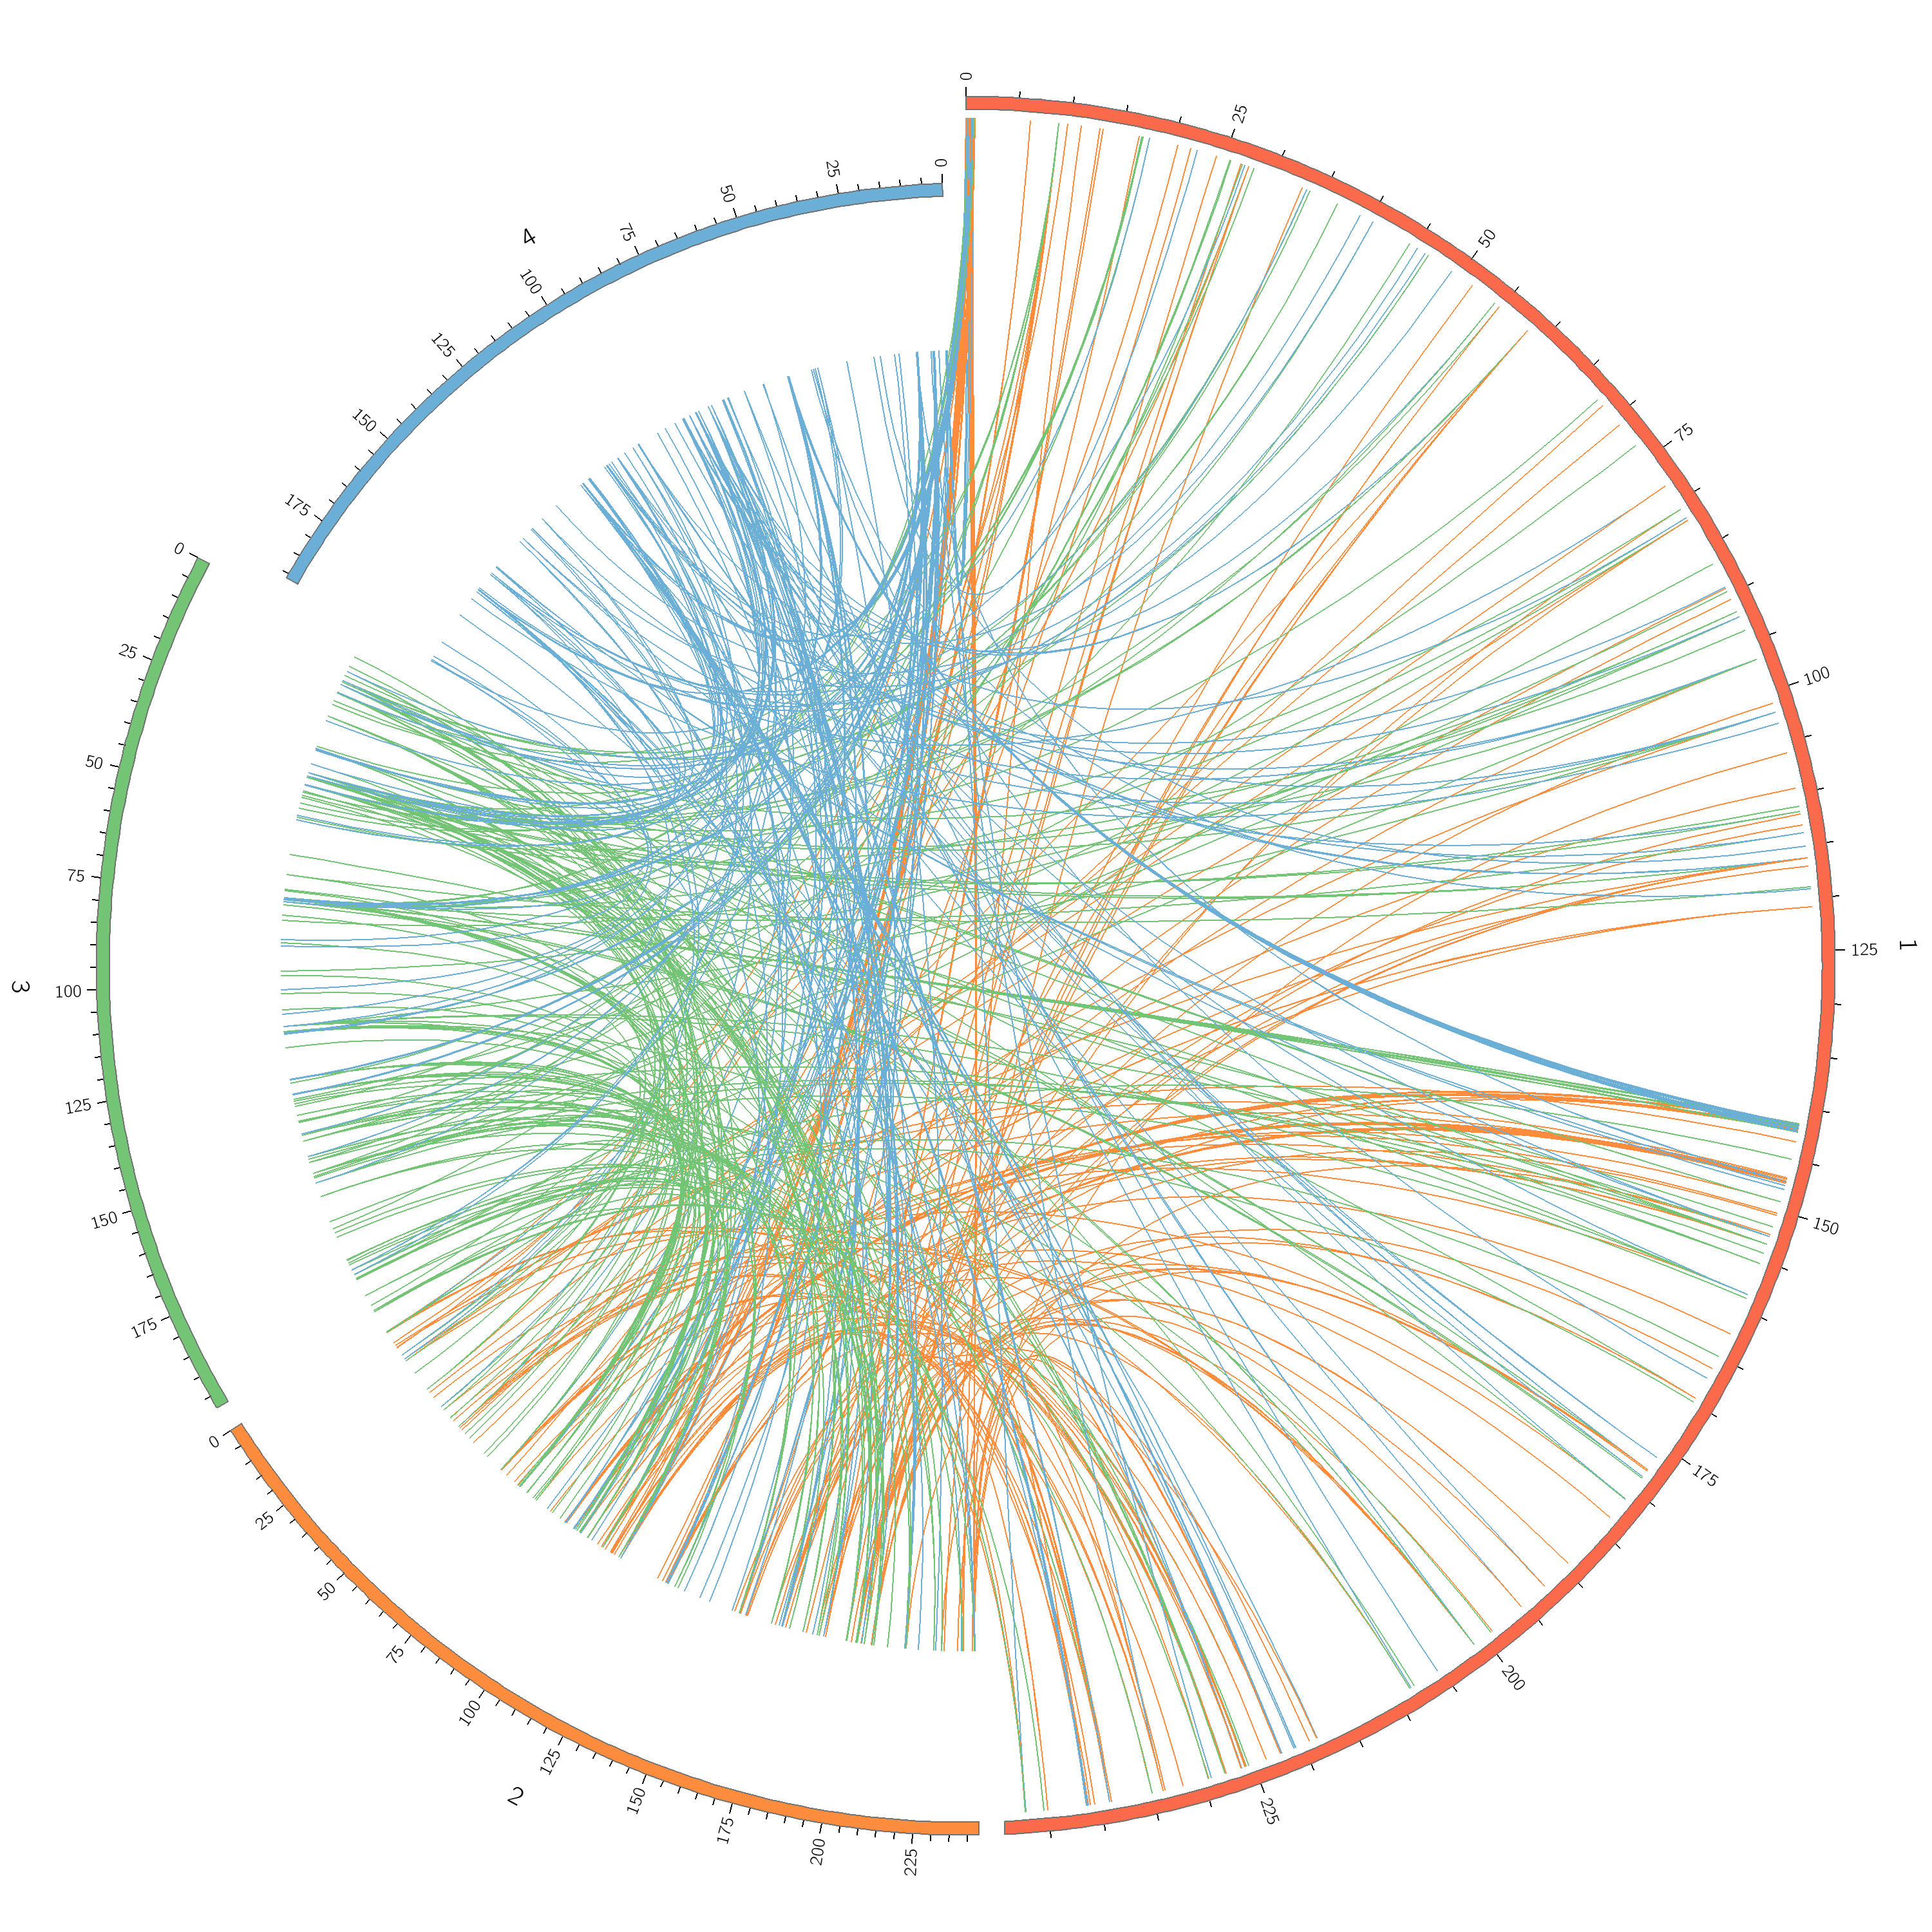

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Quick Start series by clicking [here &#10145;](Quick_Start_Part5.ipynb)</font>. 

----